In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [3]:
help(tf.keras.callbacks.Callback)

Help on class Callback in module keras.src.callbacks.callback:

class Callback(builtins.object)
 |  Base class used to build new callbacks.
 |
 |  Callbacks can be passed to keras methods such as `fit()`, `evaluate()`, and
 |  `predict()` in order to hook into the various stages of the model training,
 |  evaluation, and inference lifecycle.
 |
 |  To create a custom callback, subclass `keras.callbacks.Callback` and
 |  override the method associated with the stage of interest.
 |
 |  Example:
 |
 |  >>> training_finished = False
 |  >>> class MyCallback(Callback):
 |  ...   def on_train_end(self, logs=None):
 |  ...     global training_finished
 |  ...     training_finished = True
 |  >>> model = Sequential([
 |  ...     layers.Dense(1, input_shape=(1,))])
 |  >>> model.compile(loss='mean_squared_error')
 |  >>> model.fit(np.array([[1.0]]), np.array([[1.0]]),
 |  ...           callbacks=[MyCallback()])
 |  >>> assert training_finished == True
 |
 |  If you want to use `Callback` objec

In [4]:
# You can get more control over your training process
# This one is useless but you can have your useful one
class MyCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.998:
            print("\n model reached 99.8 accuracy so cancelling training!")
            self.model.stop_training = True

In [5]:
# Create an instance of our costume callback
callback = MyCallBack()
# Create an access point to our data
mnist = tf.keras.datasets.mnist

In [6]:
help(tf.keras.datasets.mnist.load_data)

Help on function load_data in module keras.src.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).

    Args:
        path: path where to cache the dataset locally
            (relative to `~/.keras/datasets`).

    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.

    **`y_train`**: `uint8` NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.

    **`x_test`**: `uint8` NumPy array of grayscale image data with shapes
      `(10000, 28, 28)`, containing the test data. Pixel values range
      from 0 to 255.

    

In [7]:
# load the data base on the help result
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

In [9]:
print(len(training_images[0]))
print(len(training_images[0][0]))
print(len(training_images[0][0][0]))

28
28
1


In [ ]:
%%time
# instead of initializing model separately and adding layers one by one we can do this
# Model Layers
model = tf.keras.models.Sequential([
    # 32 is number of your filters :D help() is a great function
    tf.keras.layers.Conv2D(32, (3, 3),
                           activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    # You always need Flatten after you done with your conv and pool layer, cause you want to feed your data to neurons
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Solver
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fit
model.fit(
    training_images, training_labels,
    epochs=10,
    validation_data=(test_images, test_labels),
    callbacks=[callback]
)

/opt/anaconda3/envs/ai/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9146 - loss: 0.2965 - val_accuracy: 0.9761 - val_loss: 0.0722
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9841 - loss: 0.0537 - val_accuracy: 0.9848 - val_loss: 0.0449
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9919 - loss: 0.0275 - val_accuracy: 0.9855 - val_loss: 0.0439
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9939 - loss: 0.0200 - val_accuracy: 0.9871 - val_loss: 0.0388
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9962 - loss: 0.0122 - val_accuracy: 0.9844 - val_loss: 0.0524
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9979 - loss: 0.0077 - val_accuracy: 0.9829 - val_loss: 0.0570
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9978 - loss: 0.0068 - val_accuracy: 0.9873 - val_loss: 0.0467
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9984 - loss: 0.0051 - 

In [11]:
help(tf.keras.layers.Conv2D)

Help on class Conv2D in module keras.src.layers.convolutional.conv2d:

class Conv2D(keras.src.layers.convolutional.base_conv.BaseConv)
 |  Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), groups=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |
 |  2D convolution layer.
 |
 |  This layer creates a convolution kernel that is convolved with the layer
 |  input over a 2D spatial (or temporal) dimension (height and width) to
 |  produce a tensor of outputs. If `use_bias` is True, a bias vector is created
 |  and added to the outputs. Finally, if `activation` is not `None`, it is
 |  applied to the outputs as well.
 |
 |  Note on numerical precision: While in general Keras operation execution
 |  results are identical across backends up to 1e-7 precision in fl

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,081,888 (7.94 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,387,926 (5.29 MB)

{'accuracy': [0.9555333256721497, 0.9849166870117188, 0.9897000193595886, 0.9928666949272156, 0.9954000115394592, 0.997083306312561, 0.9974833130836487, 0.9979833364486694, 0.9980166554450989], 'loss': [0.1511729657649994, 0.050754573196172714, 0.033266689628362656, 0.021326478570699692, 0.014965374954044819, 0.009534505195915699, 0.0077415164560079575, 0.006545172538608313, 0.005879437085241079], 'val_accuracy': [0.9761000275611877, 0.9847999811172485, 0.9854999780654907, 0.9871000051498413, 0.9843999743461609, 0.9829000234603882, 0.9872999787330627, 0.9830999970436096, 0.9853000044822693], 'val_loss': [0.07222909480333328, 0.04493971914052963, 0.043901875615119934, 0.03884202241897583, 0.052370939403772354, 0.05703574791550636, 0.04668499901890755, 0.07021436840295792, 0.0572860911488533]}
9


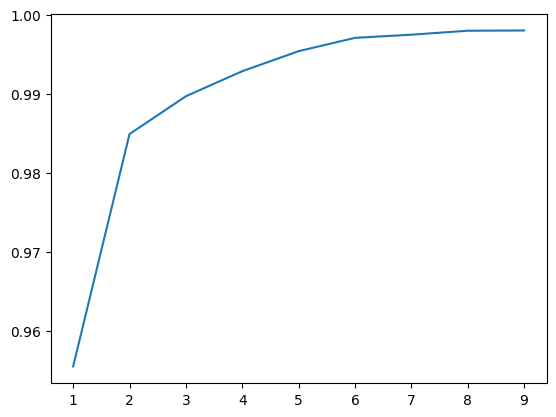

In [ ]:
h = model.history.history
print(h)
%matplotlib inline
import matplotlib.pyplot as plt
print(len(h['accuracy']))

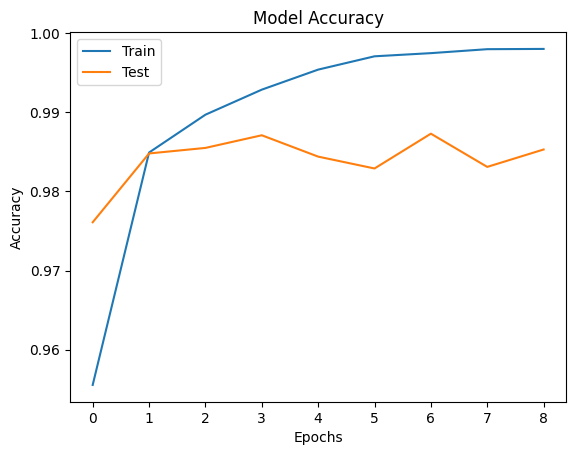

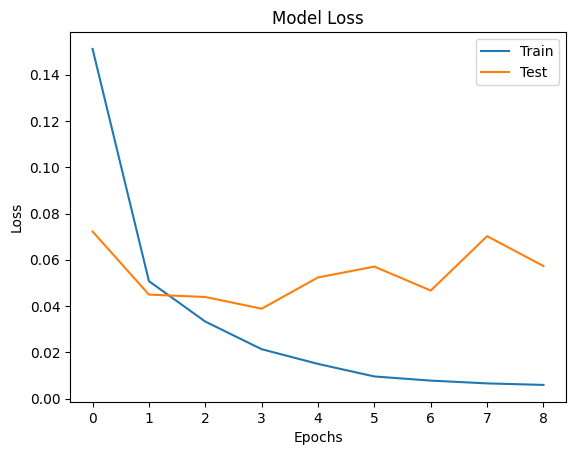

In [38]:
plt.figure()
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='best')

plt.figure()
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='best')

In [ ]:
res = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step


array([[1.3193188e-10, 3.3339267e-12, 4.8229112e-11, ..., 1.0000000e+00,
        8.6645654e-13, 4.7244035e-09],
       [2.5969483e-17, 8.0730903e-13, 1.0000000e+00, ..., 7.3504771e-17,
        8.3081743e-17, 3.5635682e-17],
       [7.3018405e-09, 9.9999857e-01, 2.8051453e-10, ..., 1.4762818e-06,
        3.3696846e-08, 1.1384601e-09],
       ...,
       [2.2639473e-19, 1.7888969e-17, 2.1684144e-19, ..., 1.8114632e-12,
        1.9937521e-10, 5.1964492e-12],
       [8.5761999e-22, 8.2348951e-20, 9.8397910e-22, ..., 1.8841102e-18,
        2.8238369e-09, 7.1038171e-15],
       [2.1804943e-13, 1.2006152e-16, 7.7520204e-17, ..., 6.5885326e-14,
        3.3281559e-13, 1.8712754e-17]], dtype=float32)

2


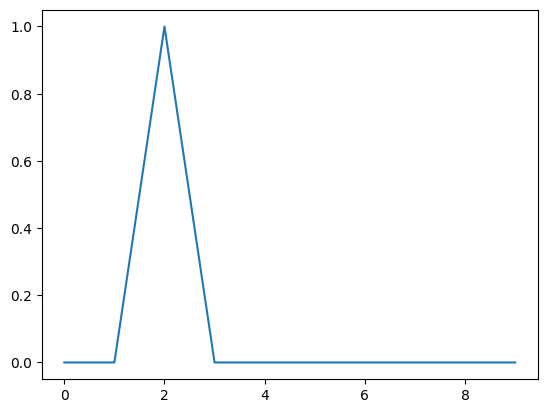

In [33]:
res[1]
print(test_labels[1])
plt.plot(range(10), res[1])

# Multiple Convolution Layer

In [51]:
%%time

# initialize and add layer to the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Solver
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit
model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8564 - loss: 0.4416 - val_accuracy: 0.9829 - val_loss: 0.0574
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9794 - loss: 0.0668 - val_accuracy: 0.9846 - val_loss: 0.0494
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9862 - loss: 0.0439 - val_accuracy: 0.9892 - val_loss: 0.0340
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9890 - loss: 0.0344 - val_accuracy: 0.9894 - val_loss: 0.0307
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9905 - loss: 0.0289 - val_accuracy: 0.9893 - val_loss: 0.0325
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9937 - loss: 0.0205 - val_accuracy: 0.9915 - val_loss: 0.0267
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9944 - loss: 0.0166 - val_accuracy: 0.9908 - val_loss: 0.0319
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9949 - loss: 0.0158 - 

In [42]:
# help(tf.keras.layers.MaxPool2D)
# help(tf.keras.layers.Conv2D)
# help(model.fit)

In [52]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,120 (254.38 KB)

 Trainable params: 21,706 (84.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 43,414 (169.59 KB)

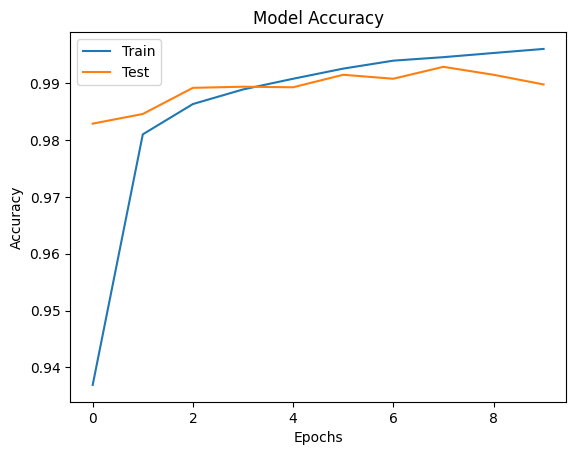

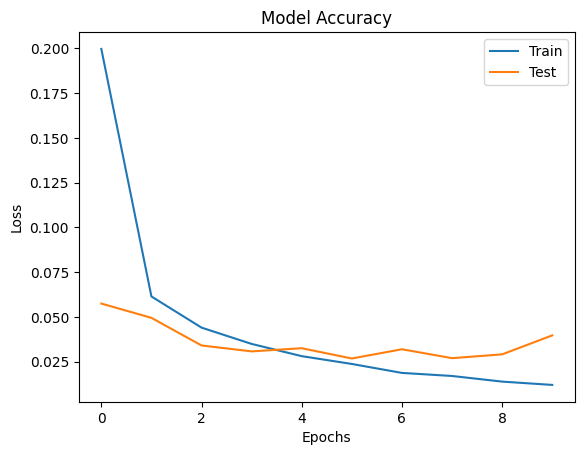

In [53]:
history = model.history.history

plt.figure()
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='best')

plt.figure()
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='best')

In [ ]:
# To disable eager execution in tensorflow so your model will train faster
# from tensorflow.python.framework.ops import disable_eager_execution
# disable_eager_execution()
# Other way
# tf.compat.v1.disable_eager_execution()